<a href="https://colab.research.google.com/github/amandatz/computational-linear-algebra/blob/main/Atividade5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 5

Amanda Topanotti Zanette (22100776)

**Importações e funções auxiliares**

In [43]:
using LinearAlgebra
using Plots

Esse trecho de código é usado apenas para garantir a repetibilidade dos números aleatórios gerados.

In [44]:
using Random
Random.seed!(12)

TaskLocalRNG()

### Questão 1

Primeiro iremos gerar os 100 pontos aleatórios $x_i$ e construir $X$.

In [45]:
n = 100
X = rand(2, n)

2×100 Matrix{Float64}:
 0.625279  0.801272  0.542473  0.475454  …  0.576916  0.268455   0.276189
 0.850311  0.318351  0.907512  0.213723     0.835868  0.0820654  0.358352

Logo, pode-se construir a matriz $D$ da seguinte forma:

In [46]:
D = [norm(X[:,i] - X[:,j])^2 for i in 1:n, j in 1:n];

### Questão 2

Primeiro iremos construir a matriz $J = I - \frac{1}{n} e e^T$

In [47]:
I_n = Matrix{Float64}(I, n, n)
e = ones(n)
eeT = e * e'
J = I_n - (1/n) * eeT;

Agora, calculemos $G= -\frac{1}{2}JDJ$

In [48]:
G = -0.5 * J * D * J;

A matriz $G$ contém erros de ponto flutuante. Portanto, estarei forçando que a matriz seja real e simétrica para eliminar pequenas partes imaginárias que prejudicam a decomposição espectral.

In [49]:
G = real.(G)
G = (G + G') / 2;

Para obter $Y=\sqrt\Lambda_rQ_r^T$, precisamos encontrar a decomposição espectral $G=Q \Lambda Q^T$.

In [50]:
function decomposicao_espectral(G::AbstractMatrix; tol=1e-10)
  # Decomposição espectral
  eig = eigen(G)
  lamb = eig.values
  Q = eig.vectors

  # Ordena autovalores em ordem decrescente
  idxs = sortperm(lamb, rev=true)
  lamb_sorted = lamb[idxs]
  Q_sorted = Q[:, idxs]

  # Seleciona autovalores positivos
  inds_pos = findall(lamb_sorted .> tol)
  Lambda_r = Diagonal(lamb_sorted[inds_pos])
  Q_r = Q_sorted[:, inds_pos]

  return Q_r, Lambda_r
end

decomposicao_espectral (generic function with 1 method)

In [51]:
Q_r, Lambda_r = decomposicao_espectral(G)
Y = sqrt.(Lambda_r) * Q_r'

2×100 Matrix{Float64}:
  0.308878  0.0110195   0.300202  …   0.266931  -0.510585  -0.292717
 -0.164868  0.309723   -0.265135     -0.19294    0.049621  -0.12046

### Questão 3

In [52]:
Xc = X*J
Yc = Y*J

2×100 Matrix{Float64}:
  0.308878  0.0110195   0.300202  …   0.266931  -0.510585  -0.292717
 -0.164868  0.309723   -0.265135     -0.19294    0.049621  -0.12046

Veja que esse é um problema de Procrustes Ortogonal cuja solução é dada ao calcular a SVD de $Y_c X_c^T = W \Sigma V^T$ e a matriz ótima $U=WV^T$.

In [53]:
F = svd(Yc * Xc')
U = F.U * F.Vt
residual = norm(U * Yc - Xc)

4.439040437259509e-15

Observe que, de fato, o a matriz $U$ é ortogonal com excessão de algum resíduo.

In [54]:
U*U'

2×2 Matrix{Float64}:
  1.0          -2.77556e-16
 -2.77556e-16   1.0

### Questão 4

In [55]:
Z = U * Yc

2×100 Matrix{Float64}:
 0.0697393   0.245732  -0.0130666  …  0.0213765  -0.287085  -0.279351
 0.343108   -0.188853   0.400309      0.328665   -0.425138  -0.148851

Observe que os pontos $x_i^c$ e $z_i$ coincidem.

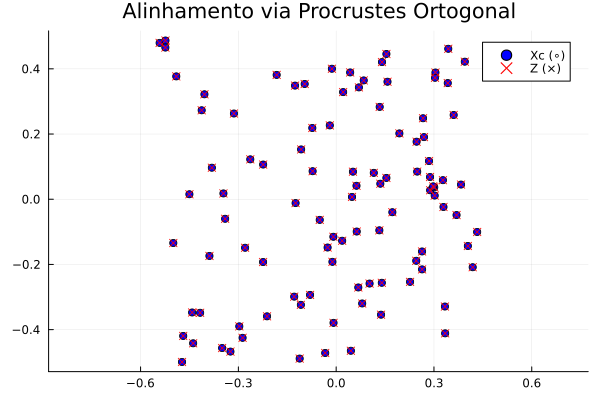

In [56]:
plt = scatter(Xc[1, :], Xc[2, :],
             markershape=:circle, markercolor=:blue, label="Xc (∘)",
             title="Alinhamento via Procrustes Ortogonal",
             aspect_ratio=:equal)

scatter!(plt, Z[1, :], Z[2, :],
         markershape=:xcross, markercolor=:red, label="Z (×)",
         legend=:topright)

display(plt)